# vgg16

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/var/folders/x7/kvfvn5f1181fksv5hmzp9zt00000gn/T/ipykernel_22000/132817085.py:63: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


898/898 [==============================] - 7235s 8s/step - loss: 1.5124 - accuracy: 0.4444 - val_loss: 1.5332 - val_accuracy: 0.4811
Epoch 2/5
898/898 [==============================] - 7334s 8s/step - loss: 1.2523 - accuracy: 0.5432 - val_loss: 1.4074 - val_accuracy: 0.4685
Epoch 3/5
898/898 [==============================] - 6946s 8s/step - loss: 1.1178 - accuracy: 0.5894 - val_loss: 1.2523 - val_accuracy: 0.5435
Epoch 4/5
898/898 [==============================] - 7553s 8s/step - loss: 0.9952 - accuracy: 0.6336 - val_loss: 1.2740 - val_accuracy: 0.5460
Epoch 5/5
898/898 [==============================] - 7800s 9s/step - loss: 0.9389 - accuracy: 0.6576 - val_loss: 1.5567 - val_accuracy: 0.4841


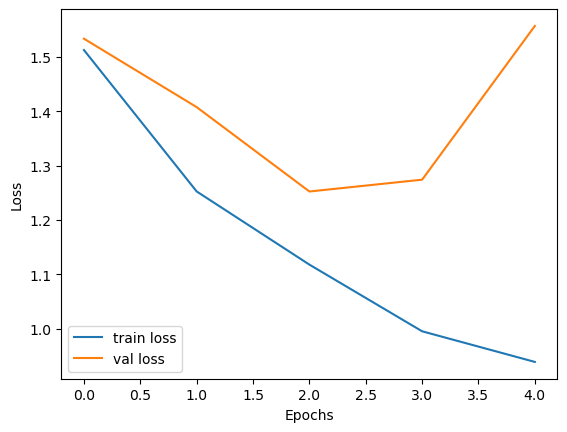

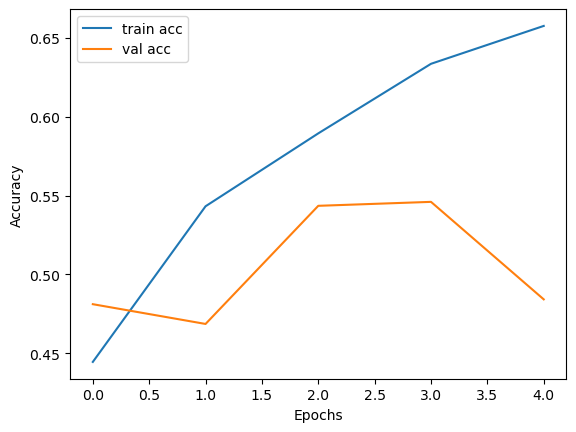

In [1]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import matplotlib.pyplot as plt

# Define image size
IMAGE_SIZE = [224, 224]

# Define train and validation paths
train_path = 'data/train'
valid_path = 'data/test'

# Load VGG16 model with pre-trained ImageNet weights
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the existing weights
for layer in vgg.layers:
    layer.trainable = False

# Get the number of classes
folders = glob(train_path + '/*')

# Add custom layers
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

# Create model
model = Model(inputs=vgg.input, outputs=prediction)

# View model structure
model.summary()

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
r = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Save model structure in JSON file
model_json = model.to_json()
with open("emotion_model1.json", "w") as json_file:
    json_file.write(model_json)

# Save trained model weights in .h5 file
model.save_weights('emotion_model1.h5')

# Plot loss and accuracy
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
